In [1]:
import m_ll
import m_tree

print("START")

START


### Linked List

In [2]:
LL_Obj = m_ll.LL(123)
LL_Obj.push_back("ABC")
LL_Obj.push_back("QWERTY")
LL_Obj.push_forword(987)
LL_Obj.print_ll()

LL_Obj.insert_after("ABC", "XYZ")
LL_Obj.del_el(123)
LL_Obj.print_ll()
LL_Obj.ll_length()

987 | 123 | ABC | QWERTY | 
987 | ABC | XYZ | QWERTY | 


4

### Binary Tree

In [3]:
BT_Obj = m_tree.PyBinTree(20)
BT_Obj.add_el(15)
BT_Obj.add_el(17)
BT_Obj.add_el(10)
BT_Obj.add_el(13)
BT_Obj.add_el(30)
BT_Obj.add_el(35)
BT_Obj.add_el(32)
BT_Obj.add_el(25)
BT_Obj.add_el(23)
BT_Obj.add_el(27)

In [4]:
BT_Obj.print_tree()

13
None <- | -> None
10
None <- | ->  13
17
None <- | -> None
15
10  <- | ->  17
23
None <- | -> None
27
None <- | -> None
25
23  <- | ->  27
32
None <- | -> None
35
32  <- | -> None
30
25  <- | ->  35
20
15  <- | ->  30


### Tree vizualisation

In [16]:
import pandas as pd
from matplotlib import collections  as mc
import matplotlib.pyplot as pl

def tree_df(Obj):
    dtTree = pd.DataFrame(Obj.l_plot())
    dtTree.columns = ['Level', 'Data', 'Left', 'Right']
    dtTree['nLvl'] = dtTree['Level'].astype(int) + 1
    return dtTree

def merge(l1, l2):
    ret = [[tuple(l1[i]),tuple(l2[i])] for i in range(0,len(l1))]
    return ret

def df_to_segments(df1, df2):
    df1 = df1.to_records(index=False)
    df1 = list(df1)
    df2 = df2.to_records(index=False)
    df2 = list(df2)
    ret = [[tuple(df1[i]),tuple(df2[i])] for i in range(0,len(df1))]
    ret = list(filter(lambda item: item[0][1] != item[1][1], ret))
    return ret

def plot_tree(lL, lR, df):
    lc = mc.LineCollection(lL, linewidths=0.5)
    rc = mc.LineCollection(lR, linewidths=0.5)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.add_collection(rc)
    ax.scatter(x=df['Level'],y=df['Data'], color='red', s=2)
    ax.autoscale()
    ax.margins(0.1)
    return ax

def segmentated_tree(Obj, plot = False, ret = False):
    df = tree_df(Obj)
    lLeft = df_to_segments(df[['Level','Data']], df[['nLvl','Left']])
    lRight = df_to_segments(df[['Level','Data']], df[['nLvl','Right']])
    if (plot == True):
        plot_tree(lLeft, lRight, df)

    if (ret == True):
        return lLeft, lRight, df

tree_df(BT_Obj).tail()

,Level,Data,Left,Right,nLvl
25,5,9840074,9840074,9840074,6
26,4,9733520,8865826,9840074,5
27,3,8778397,6545812,9733520,4
28,2,4280571,1476771,8778397,3
29,1,-762268,-5377316,4280571,2


[-9907313, -9811453, -8728200, -8672949, -7823311, -7798912, -7501696, -5377316, -5143119, -4010383, -3246179, -3234012, -1942070, -1839160, -1213506, -762268, -680987, 1076499, 1476771, 1653443, 1946797, 3119323, 4280571, 4910826, 6545812, 6816092, 8778397, 8865826, 9733520, 9840074]


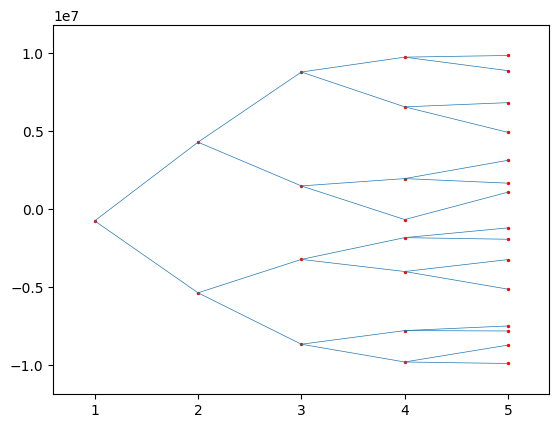

In [17]:
segmentated_tree(BT_Obj, plot=True)
print(BT_Obj.vectorize_tree())

### Balanced Tree

[-9907313, -9811453, -8728200, -8672949, -7823311, -7798912, -7501696, -5377316, -5143119, -4010383, -3246179, -3234012, -1942070, -1839160, -1213506, -762268, -680987, 1076499, 1476771, 1653443, 1946797, 3119323, 4280571, 4910826, 6545812, 6816092, 8778397, 8865826, 9733520, 9840074]


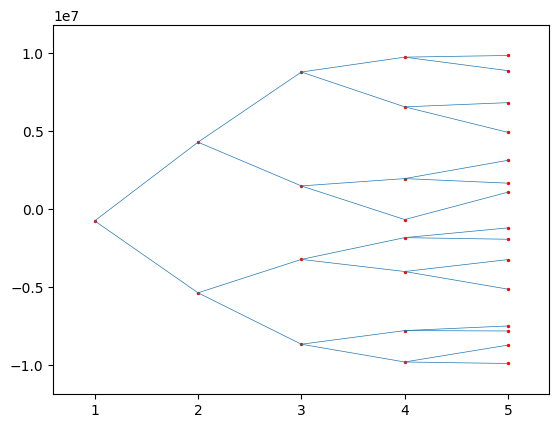

In [18]:
BT_Obj.balance_tree()
segmentated_tree(BT_Obj, plot=True)
print(BT_Obj.vectorize_tree())

[-9669999, -9477658, -7863962, -7553058, -6711270, -6363792, -6354896, -5100572, -4928390, -4263572, -4144919, -2770551, -1201226, -368467, 112901, 606904, 683229, 1072525, 1131204, 3123019, 3247671, 4442226, 5424556, 6769247, 6944505, 7650104, 8072756, 8784737, 9188720, 9809202]


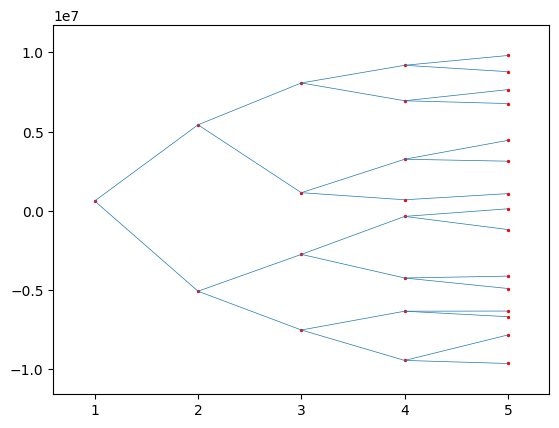

In [22]:
import gen_rand
import numpy as np

rand_obj = gen_rand.Rand_set(30,31,1)
ds = list(rand_obj.gen_rand_prnt(False, True)[0])
BT_Obj.balance_tree(vec = ds)
segmentated_tree(BT_Obj, plot=True)
print(BT_Obj.vectorize_tree())